In [3]:
##Setting the path for the packages
setwd("/work/MikheyevU/Maeva/varroa-jump/data/mtdna_var/R")
.libPaths("/home/m/maeva-techer/R/x86_64-redhat-linux-gnu-library/3.2")

In [ ]:
##Import packages we will need
library(ade4)
library(ape)
library(adegenet)
library(ggplot2)
library(vcfR)
library(adegraphics)
library(pegas)
library(StAMPP)
library(lattice)
library(gplots)
library(ggmap) 
library(poppr)
library(RColorBrewer)
library(gridExtra)
library(ggplot2)
library(igraph)
library(gridExtra)

Warning message:
“replacing previous import ‘Matrix::expm’ by ‘expm::expm’ when loading ‘spdep’”

In [3]:
##import vcf file
mtdnavcf <- read.vcfR("/work/MikheyevU/Maeva/varroa-jump/data/mtdna_var/mtdnarawp1.vcf")
head(mtdnavcf)

Meta line 61 read in.
All meta lines processed.
Character matrix gt created.
Character matrix gt rows: 611
Character matrix gt cols: 53
skip: 0
nrows: 611
row_num: 0

Processed variant: 611
All variants processed
[1] "***** Object of class 'vcfR' *****"
[1] "***** Meta section *****"
[1] "##fileformat=VCFv4.1"
[1] "##fileDate=20171108"
[1] "##source=freeBayes v1.0.2-6-g3ce827d-dirty"
[1] "##reference=ref/destructor/mtdnamite/VDAJ493124.fasta"
[1] "##phasing=none"
[1] "##commandline=\"freebayes --ploidy 1 --min-alternate-fraction 0.2 --u [Truncated]"
[1] "First 6 rows."
[1] 
[1] "***** Fixed section *****"
     CHROM        POS   ID REF ALT QUAL      FILTER
[1,] "AJ493124.2" "16"  NA "G" "A" "24606.4" NA    
[2,] "AJ493124.2" "77"  NA "A" "T" "2149.14" NA    
[3,] "AJ493124.2" "99"  NA "A" "G" "72780.8" NA    
[4,] "AJ493124.2" "107" NA "A" "G" "6120.97" NA    
[5,] "AJ493124.2" "257" NA "A" "G" "39254.4" NA    
[6,] "AJ493124.2" "260" NA "C" "T" "8533.5"  NA    
[1] 
[1] "***** Genotyp

In [4]:
mtdnavcf

***** Object of Class vcfR *****
44 samples
1 CHROMs
611 variants
Object size: 3 Mb
0 percent missing data
*****        *****         *****

In [6]:
##import the population data
pop.data <- read.table("/work/MikheyevU/Maeva/varroa-jump/data/mtdna_var/popvarroa-mtdna.txt", sep = "\t", header = TRUE)
summary(pop.data)

   Sample_ID    POP     Country        new    Spe    
 VD149  : 1   VDAC:15   CHN:11   VJAM-PNG:9   VD:24  
 VD150_2: 1   VDAM: 9   IND: 6   VDAC-VNM:7   VJ:20  
 VD153_2: 1   VJAC:11   KOR: 3   VDAC-CHN:6          
 VD159_1: 1   VJAM: 9   MYS: 1   VJAC-IND:6          
 VD212  : 1             PNG:13   VDAM-CHN:5          
 VD474_1: 1             THA: 1   VJAC-PNG:4          
 (Other):38             VNM: 9   (Other) :7          

In [7]:
pop.data

Sample_ID,POP,Country,new,Spe
VD149,VDAC,VNM,VDAC-VNM,VD
VD150_2,VDAM,VNM,VDAM-VNM,VD
VD153_2,VDAM,KOR,VDAM-KOR,VD
VD159_1,VDAM,KOR,VDAM-KOR,VD
VD212,VDAC,KOR,VDAC-KOR,VD
VD474_1,VDAM,VNM,VDAM-VNM,VD
VD475_1,VDAC,VNM,VDAC-VNM,VD
VD577_1,VDAC,CHN,VDAC-CHN,VD
VD622_1,VDAM,CHN,VDAM-CHN,VD
VD625_2,VDAM,CHN,VDAM-CHN,VD


In [8]:
#converting database to a genlight object
gl.mtdna <- vcfR2genlight(mtdnavcf)
ploidy(gl.mtdna) <- 1
pop(gl.mtdna) <- pop.data$POP

Warning message in vcfR2genlight(mtdnavcf):
“Found 136 loci with more than two alleles.
Objects of class genlight only support loci with two alleles.
136 loci will be omitted from the genlight object.”

In [9]:
gl.mtdna@ind.names

[1] "VD149"      "VD150_2"    "VD153_2"    "VD159_1"    "VD212"     
 [6] "VD474_1"    "VD475_1"    "VD577_1"    "VD622_1"    "VD625_2"   
[11] "VD639_1"    "VD641_1"    "VD642_1"    "VD646_1"    "VD651_1"   
[16] "VD654_1"    "VD657_1"    "VD658_2"    "VD676_2"    "VD780"     
[21] "VD787_2"    "VD788_1_V2" "VD788_2"    "VD789_1"    "VJ028"     
[26] "VJ325_1"    "VJ333_1"    "VJ341_1"    "VJ347_1"    "VJ363_1"   
[31] "VJ565_2"    "VJ847"      "VJ852_3_V2" "VJ853_4_V2" "VJ854_1"   
[36] "VJ856_1"    "VJ857_2"    "VJ950_1"    "VJ952_1"    "VJ953_2"   
[41] "VJ954_2"    "VJ955_1"    "VJ956_4_V2" "VJ983_1"

In [10]:
##compute distance matrix
x.dist <- dist(gl.mtdna)
x.dist <- poppr::bitwise.dist(gl.mtdna)
colnames(mtdnavcf@gt)[-1] == pop.data$Sample_ID

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [12]:
gl.mtdna

 /// GENLIGHT OBJECT /////////

 // 44 genotypes,  475 binary SNPs, size: 99.5 Kb
 0 (0 %) missing data

 // Basic content
   @gen: list of 44 SNPbin
   @ploidy: ploidy of each individual  (range: 1-1)

 // Optional content
   @ind.names:  44 individual labels
   @loc.names:  475 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @pop: population of each individual (group size range: 9-15)
   @other: a list containing: elements without names 


In [2]:
##distance tree
tree <- aboot(gl.mtdna, tree = "upgma", distance = bitwise.dist, sample = 1000, showtree = F, cutoff = 50, quiet = T)
##plot the tree
myCol <- c("red4", #VDAC
              "lightcoral",#VDAM
              "blue2",#VJAC
              "deepskyblue2")#VJAM
plot.phylo(tree, cex = 0.8, font = 2, adj = 0, tip.color =  myCol[pop(gl.mtdna)])
nodelabels(tree$node.label, adj = c(1.3, -0.5), frame = "n", cex = 0.6,font = 3, xpd = TRUE)
legend('topleft', legend = c("Vd_Ac","Vd_Am","Vj_Ac", "Vj_Am"), fill = myCol, border = FALSE, bty = "n", cex = 2)
axis(side = 1)
title(xlab = "Genetic distance on 475 SNPs - mtDNA (proportion of loci that are different)")

ERROR: Error in eval(expr, envir, enclos): could not find function "aboot"


In [16]:
##minimum spanning tree
mtdna.dist <- bitwise.dist(gl.mtdna)
mtdna.msn <- poppr.msn(gl.mtdna, mtdna.dist, showplot = FALSE, include.ties = T)
node.size <- rep(2, times = nInd(gl.mtdna))
names(node.size) <- indNames(gl.mtdna)

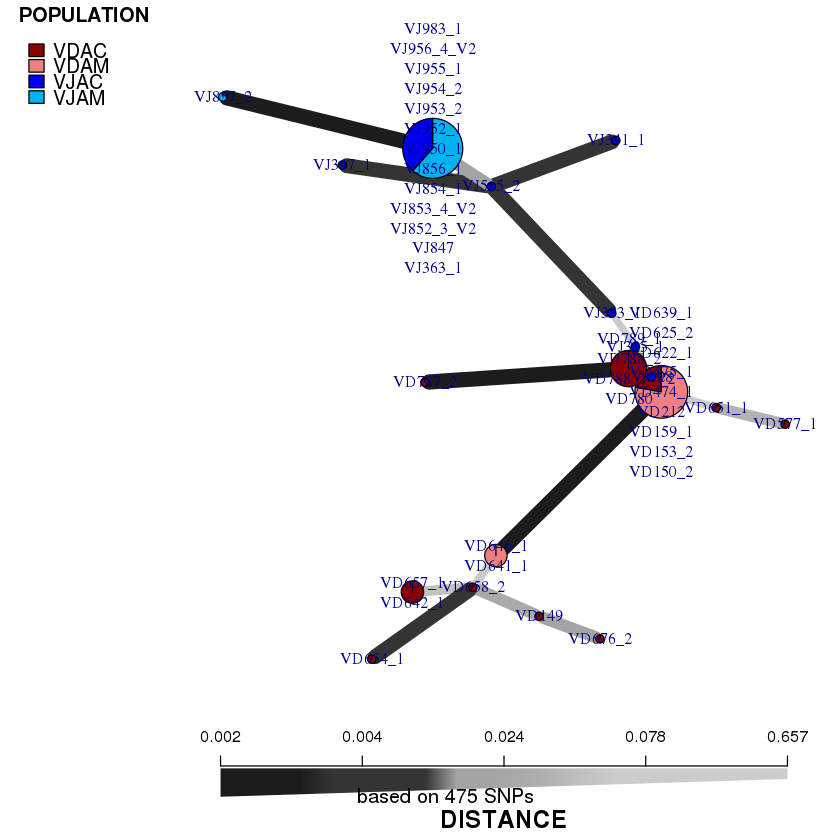

In [17]:
set.seed(15)
plot_poppr_msn(gl.mtdna, mtdna.msn , palette = myCol, gadj = 70)
title(xlab = "based on 475 SNPs")

In [23]:
gl.subset <- gl.mtdna[indNames(gl.mtdna) != "VJ028"]
gl.subset

 /// GENLIGHT OBJECT /////////

 // 43 genotypes,  475 binary SNPs, size: 98 Kb
 0 (0 %) missing data

 // Basic content
   @gen: list of 43 SNPbin
   @ploidy: ploidy of each individual  (range: 1-1)

 // Optional content
   @ind.names:  43 individual labels
   @loc.names:  475 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @pop: population of each individual (group size range: 9-15)
   @other: a list containing: elements without names 


In [25]:
##compute distance matrix
x.dist1 <- dist(gl.subset)
x.dist1 <- poppr::bitwise.dist(gl.subset)

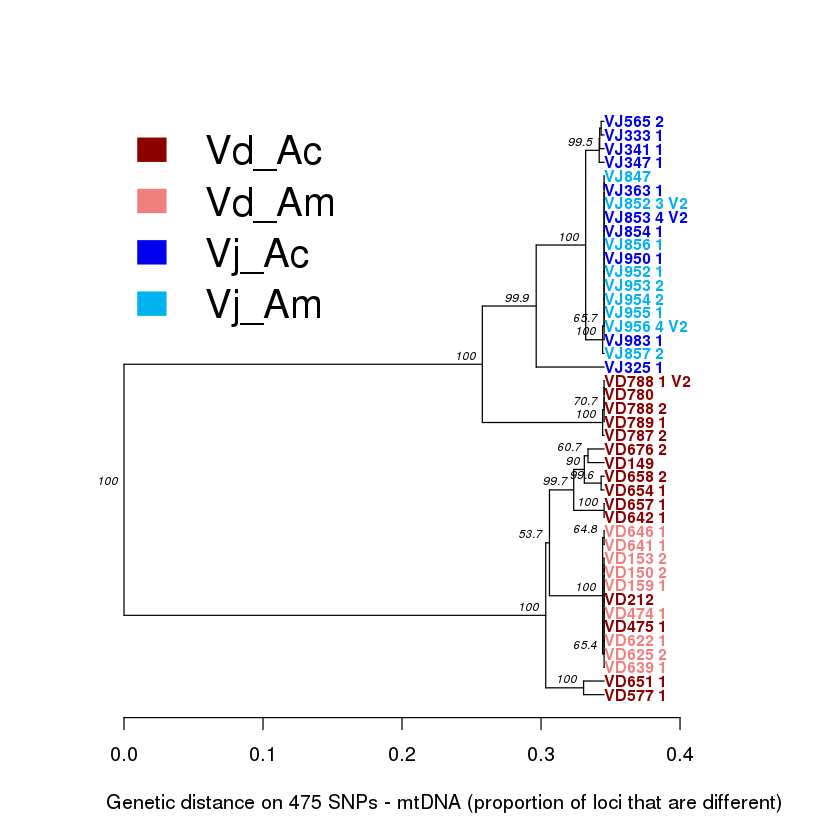

In [27]:
##distance tree
tree1 <- aboot(gl.subset, tree = "upgma", distance = bitwise.dist, sample = 1000, showtree = F, cutoff = 50, quiet = T)
##plot the tree
myCol <- c("red4", #VDAC
              "lightcoral",#VDAM
              "blue2",#VJAC
              "deepskyblue2")#VJAM
plot.phylo(tree1, cex = 0.8, font = 2, adj = 0, tip.color =  myCol[pop(gl.subset)])
nodelabels(tree1$node.label, adj = c(1.3, -0.5), frame = "n", cex = 0.6,font = 3, xpd = TRUE)
legend('topleft', legend = c("Vd_Ac","Vd_Am","Vj_Ac", "Vj_Am"), fill = myCol, border = FALSE, bty = "n", cex = 2)
axis(side = 1)
title(xlab = "Genetic distance on 475 SNPs - mtDNA (proportion of loci that are different)")